# Факультативный материал: Фазовые портреты и анализ чувствительности параметров
# Supplementary Material: Phase Portraits and Parameter Sensitivity Analysis

## Двуязычный блокнот Julia для курса математического моделирования в биологии и медицине
## Bilingual Julia Notebook for Mathematical Modeling Course in Biology and Medicine

# Фазовые портреты и анализ чувствительности параметров
# Phase Portraits and Parameter Sensitivity Analysis

## Что такое фазовый портрет? | What is a Phase Portrait?

**Фазовый портрет** — это геометрическое представление траекторий динамической системы на фазовой плоскости. Для системы двух дифференциальных уравнений:

$$
\begin{cases}
\frac{dx}{dt} = f(x, y, \vec{p}) \\
\frac{dy}{dt} = g(x, y, \vec{p})
\end{cases}
$$

фазовый портрет показывает, как изменяются переменные $x$ и $y$ во времени при различных начальных условиях и значениях параметров $\vec{p}$.

**A phase portrait** is a geometric representation of the trajectories of a dynamical system in the phase plane. For a system of two differential equations as shown above, the phase portrait illustrates how variables $x$ and $y$ evolve over time under different initial conditions and parameter values $\vec{p}$.

### Ключевые элементы | Key Elements

| Русский | English | Описание | Description |
|---------|---------|----------|-------------|
| **Траектории** | **Trajectories** | Пути, по которым движется система | Paths along which the system evolves |
| **Нуль-изоклины** | **Nullclines** | Кривые, где $\frac{dx}{dt}=0$ или $\frac{dy}{dt}=0$ | Curves where the rate of change is zero |
| **Точки равновесия** | **Equilibrium points** | Пересечения нуль-изоклин, где система "останавливается" | Intersections of nullclines where the system is at rest |
| **Векторное поле** | **Vector field** | Направление и скорость изменения в каждой точке | Direction and magnitude of change at each point |
| **Предельный цикл** | **Limit cycle** | Замкнутая изолированная траектория | Closed isolated trajectory representing oscillations |



## Зачем это нужно в медицине? | Why is this Useful in Medicine?

1. **Анализ устойчивости биологических систем** | **Stability analysis of biological systems**  
   Гомеостаз глюкозы, иммунный ответ, гормональная регуляция  
   *Glucose homeostasis, immune response, hormonal regulation*

2. **Поиск бифуркаций** | **Bifurcation analysis**  
   Критические значения параметров, при которых поведение системы качественно меняется  
   *Critical parameter values where system behavior changes qualitatively*

3. **Оптимизация терапии** | **Therapy optimization**  
   Понимание того, как изменение дозировки влияет на динамику заболевания  
   *Understanding how dosage changes affect disease dynamics*

4. **Интерпретация клинических данных** | **Clinical data interpretation**  
   Визуализация скрытых динамических процессов по наблюдаемым данным  
   *Visualization of hidden dynamic processes from observable data*

5. **Прогнозирование исходов** | **Outcome prediction**  
   Оценка вероятности перехода между здоровым и патологическим состояниями  
   *Estimating probability of transition between healthy and pathological states*

## Анализ чувствительности | Sensitivity Analysis

**Чувствительность** показывает, насколько сильно изменение параметра влияет на выход системы. Формально, локальная безразмерная чувствительность по параметру $p_j$:

$$
S_{j}(t) = \frac{\partial x(t)}{\partial p_j} \cdot \frac{p_j}{x(t)}
$$

**Sensitivity** quantifies how strongly a change in a parameter affects the system output. Formally, the local dimensionless sensitivity with respect to parameter $p_j$ is defined as above.

### Типы анализа чувствительности | Types of Sensitivity Analysis

| Метод | Method | Преимущества | Advantages | Ограничения | Limitations |
|-------|--------|-------------|------------|-------------|-------------|
| **Конечные разности** | **Finite differences** | Простота, универсальность | Simple, universal | Локальность, выбор шага | Local only, step-size dependent |
| **Автоматическое дифференцирование** | **Automatic differentiation** | Точность, эффективность | Exact derivatives, efficient | Требует поддержки AD | Requires AD-compatible code |
| **Метод Морриса** | **Morris method** | Глобальный скрининг, умеренная стоимость | Global screening, moderate cost | Полуколичественный | Semi-quantitative results |
| **Метод Соболя** | **Sobol method** | Полная декомпозиция дисперсии | Full variance decomposition | Высокая вычислительная стоимость | Computationally expensive |

### Применение в медицине | Medical Applications

- 🔍 **Идентификация ключевых параметров** для таргетной терапии  
  *Identification of key parameters for targeted therapy*
  
- 📊 **Оценка неопределённости прогнозов** модели  
  *Quantifying uncertainty in model predictions*
  
- 🧪 **Планирование экспериментов**: какие параметры измерять точнее?  
  *Experimental design: which parameters require more precise measurement?*
  
- 💊 **Персонализация лечения**: учет межпациентной вариабельности параметров  
  *Treatment personalization: accounting for inter-patient parameter variability*

In [37]:
# ╔═╡ Установка и импорт пакетов | Package installation and import
# Для запуска в Pluto.jl или Jupyter с IJulia
# For use in Pluto.jl or Jupyter with IJulia

begin
    # Раскомментируйте, если пакеты не установлены | Uncomment if packages not installed
    # using Pkg
    # Pkg.add(["DifferentialEquations", "Plots", "LinearAlgebra", "Statistics", "LabelledArrays", "ForwardDiff", "NLsolve", "StatsBase"])
    
    using DifferentialEquations  # Решение ОДУ | ODE solving
    using Plots                  # Визуализация | Visualization
    using LinearAlgebra          # Линейная алгебра | Linear algebra
    using Statistics             # Статистика | Statistics
    using LabelledArrays         # Именованные параметры | Named parameters
    using ForwardDiff            # Автоматическое дифференцирование | Automatic differentiation
    using NLsolve                # Поиск корней/равновесий | Root/equilibrium finding
    
    # Настройка темы графиков | Plot theme configuration
    default(
        framestyle = :box,
        grid = true,
        linewidth = 2,
        markersize = 4,
        titlefont = font(12),
        guidefont = font(10),
        tickfont = font(9),
        legend = :outerright,
        size = (800, 600),
        palette = :Set1_9  # Use built-in palette
    )
    
    println("✅ Окружение готово | Environment ready")
    println("📦 Loaded packages: DifferentialEquations, Plots, LinearAlgebra, Statistics, LabelledArrays, ForwardDiff")
end

✅ Окружение готово | Environment ready
📦 Loaded packages: DifferentialEquations, Plots, LinearAlgebra, Statistics, LabelledArrays, ForwardDiff


### Базовые функции для фазовых портретов | Basic Phase Portrait Functions

## Вспомогательные функции | Helper Functions

Ниже представлены функции, которые можно использовать для построения фазовых портретов и анализа динамических систем. Эти функции можно вынести в отдельный модуль для повторного использования.

*Below are helper functions for constructing phase portraits and analyzing dynamical systems. These can be exported to a separate module for reuse.*

### Функция `compute_nullclines` | Function Description

**Назначение | Purpose**: Вычисляет нуль-изоклины для системы $dx/dt=f(x,y)$, $dy/dt=g(x,y)$  
*Computes nullclines for the system $dx/dt=f(x,y)$, $dy/dt=g(x,y)$*

**Алгоритм | Algorithm**:
1. Дискретизация фазовой плоскости | Discretize the phase plane
2. Для каждой фиксированной $y$ ищем корни $f(x,y)=0$ по $x$ | For each fixed $y$, find roots of $f(x,y)=0$ in $x$
3. Аналогично для $g(x,y)=0$ | Similarly for $g(x,y)=0$
4. Используем метод бисекции для уточнения | Use bisection method for refinement

**Возвращаемые значения | Returns**: Два массива точек для изоклин $dx/dt=0$ и $dy/dt=0$  
*Two arrays of points for nullclines $dx/dt=0$ and $dy/dt=0$*

### Функция `plot_phase_portrait` | Function Description

**Назначение | Purpose**: Строит комплексный фазовый портрет с опциями визуализации  
*Constructs a comprehensive phase portrait with visualization options*

**Параметры | Parameters**:
- `f, g`: правые части системы | right-hand sides of the system
- `x_range, y_range`: диапазоны осей | axis ranges
- `trajectories`: список начальных условий для траекторий | list of initial conditions for trajectories
- `show_nullclines`: отображать нуль-изоклины | show nullclines toggle
- `show_field`: отображать векторное поле | show vector field toggle
- `equilibrium_points`: известные точки равновесия | known equilibrium points

**Возвращает | Returns**: Объект графика Plots.jl, готовый к отображению или дальнейшей модификации  
*A Plots.jl plot object, ready for display or further modification*

In [38]:
# ╔═╡ Вспомогательные функции | Helper functions
# Эти функции можно вынести в отдельный модуль | These can be moved to a separate module

"""
    compute_nullclines(f, g, x_range, y_range; resolution=100)

Вычисляет нуль-изоклины для системы dx/dt=f(x,y), dy/dt=g(x,y)
Computes nullclines for the system dx/dt=f(x,y), dy/dt=g(x,y)

# Arguments
- `f::Function`: right-hand side for dx/dt
- `g::Function`: right-hand side for dy/dt  
- `x_range::Tuple`: (xmin, xmax) range for x-axis
- `y_range::Tuple`: (ymin, ymax) range for y-axis
- `resolution::Int`: grid resolution for search (default: 100)

# Returns
- `nullcline_x::Vector{Tuple}`: points where dx/dt = 0
- `nullcline_y::Vector{Tuple}`: points where dy/dt = 0
"""
function compute_nullclines(f, g, x_range, y_range; resolution=100)
    x_vals = range(x_range..., length=resolution)
    y_vals = range(y_range..., length=resolution)
    
    # Нуль-изоклина dx/dt = 0 (красная) | Nullcline dx/dt = 0 (red)
    nullcline_x = []
    for y in y_vals
        # Ищем корни f(x,y)=0 по x для фиксированного y
        # Find roots of f(x,y)=0 in x for fixed y
        sign_changes = []
        f_prev = f(x_vals[1], y)
        for i in 2:length(x_vals)
            f_curr = f(x_vals[i], y)
            if f_prev * f_curr < 0  # Sign change detected
                push!(sign_changes, (x_vals[i-1], x_vals[i]))
            end
            f_prev = f_curr
        end
        # Простая бисекция для уточнения | Simple bisection for refinement
        for (a, b) in sign_changes
            for _ in 1:20  # 20 iterations ≈ 1e-6 precision
                m = (a + b) / 2
                if f(a, y) * f(m, y) <= 0
                    b = m
                else
                    a = m
                end
            end
            push!(nullcline_x, ((a+b)/2, y))
        end
    end
    
    # Нуль-изоклина dy/dt = 0 (синяя) | Nullcline dy/dt = 0 (blue)
    nullcline_y = []
    for x in x_vals
        sign_changes = []
        g_prev = g(x, y_vals[1])
        for i in 2:length(y_vals)
            g_curr = g(x, y_vals[i])
            if g_prev * g_curr < 0
                push!(sign_changes, (y_vals[i-1], y_vals[i]))
            end
            g_prev = g_curr
        end
        for (a, b) in sign_changes
            for _ in 1:20
                m = (a + b) / 2
                if g(x, a) * g(x, m) <= 0
                    b = m
                else
                    a = m
                end
            end
            push!(nullcline_y, (x, (a+b)/2))
        end
    end
    
    return nullcline_x, nullcline_y
end

"""
    plot_phase_portrait(f, g, x_range, y_range; kwargs...)

Строит фазовый портрет системы
Plots phase portrait of the system

# Optional keyword arguments
- `trajectories::Vector{Tuple}`: initial conditions for solution curves
- `show_nullclines::Bool`: display nullclines (default: true)
- `show_field::Bool`: display vector field (default: true)
- `field_density::Int`: density of vector field arrows (default: 20)
- `equilibrium_points::Vector{Tuple}`: known equilibrium points to mark
"""
function plot_phase_portrait(f, g, x_range, y_range; 
                             trajectories=[], 
                             show_nullclines=true,
                             show_field=true,
                             field_density=20,
                             equilibrium_points=[],
                             kwargs...)
    
    p = plot(xlabel="x", ylabel="y", title="Phase Portrait / Фазовый портрет"; kwargs...)
    
    # Нуль-изоклины | Nullclines
    if show_nullclines
        nc_x, nc_y = compute_nullclines(f, g, x_range, y_range)
        if !isempty(nc_x)
            scatter!(p, [pt[1] for pt in nc_x], [pt[2] for pt in nc_x],
                    color=:red, ms=2, label="dx/dt = 0", marker=:circle, alpha=0.7)
        end
        if !isempty(nc_y)
            scatter!(p, [pt[1] for pt in nc_y], [pt[2] for pt in nc_y],
                    color=:blue, ms=2, label="dy/dt = 0", marker=:diamond, alpha=0.7)
        end
    end
    
    # Траектории | Trajectories
    for (i, traj) in enumerate(trajectories)
        sol = solve_traje(f, g, traj, x_range, y_range)
        if !isnothing(sol)
            plot!(p, sol[1,:], sol[2,:], 
                  label="Trajectory $i / Траектория $i", linewidth=2)
            # Начальная точка | Initial point marker
            scatter!(p, [traj[1]], [traj[2]], 
                    marker=:star5, ms=8, color=:green, 
                    label=i==1 ? "Start / Старт" : "", alpha=0.9)
        end
    end
    
    # Точки равновесия | Equilibrium points
    for (i, eq) in enumerate(equilibrium_points)
        scatter!(p, [eq[1]], [eq[2]], 
                marker=:star10, ms=12, color=:black, 
                label=i==1 ? "Equilibrium / Равновесие" : "", 
                strokecolor=:yellow, strokewidth=1)
    end
    
    return p
end

# Простой интегратор для фазовых траекторий | Simple integrator for phase trajectories
function solve_traje(f, g, ic, x_range, y_range; tspan=(0.0, 50.0), dt=0.1)
    try
        function odefunc!(du, u, p, t)
            du[1] = f(u[1], u[2])
            du[2] = g(u[1], u[2])
        end
        prob = ODEProblem(odefunc!, [ic...], tspan)
        sol = solve(prob, Tsit5(), saveat=dt, abstol=1e-8, reltol=1e-6)
        return Array(sol)
    catch e
        @warn "Integration failed for IC $ic: $e"
        return nothing
    end
end

solve_traje (generic function with 1 method)

# Пример 1: Осциллятор с затуханием (учебный) | Example 1: Damped Oscillator (Educational)

### Гармонический осциллятор | Harmonic Oscillator

Классическая модель, полезная для понимания фазовых портретов:

*A classic model useful for understanding phase portraits:*

$$
\begin{cases}
\dot{x} = y \\
\dot{y} = -\omega^2 x - \gamma y
\end{cases}
$$

**Переменные | Variables**:
- $x$ — отклонение от равновесия (например, концентрация вещества)  
  *$x$ — deviation from equilibrium (e.g., substance concentration)*
- $y$ — скорость изменения ($\dot{x}$)  
  *$y$ — rate of change ($\dot{x}$)*

**Параметры | Parameters**:
- $\omega$ — собственная частота колебаний  
  *$\omega$ — natural frequency of oscillations*
- $\gamma$ — коэффициент затухания (диссипации)  
  *$\gamma$ — damping (dissipation) coefficient*

### Типы поведения | Types of Behavior

| Условие | Condition | Тип точки равновесия | Equilibrium Type | Фазовый портрет | Portrait |
|---------|-----------|---------------------|-----------------|-----------------|----------|
| $\gamma = 0$ | No damping | **Центр** | Center | Замкнутые эллипсы | Closed ellipses |
| $0 < \gamma < 2\omega$ | Underdamped | **Устойчивый фокус** | Stable focus | Спираль к началу | Spiral to origin |
| $\gamma > 2\omega$ | Overdamped | **Устойчивый узел** | Stable node | Прямые траектории к началу | Direct paths to origin |
| $\gamma < 0$ | Negative damping | **Неустойчивый фокус** | Unstable focus | Спираль от начала | Spiral from origin |

**Медицинская интерпретация | Medical Interpretation**:  
Может описывать колебания гормонального уровня с регуляторной обратной связью, где затухание отражает эффективность гомеостатических механизмов.  
*May describe hormonal level oscillations with regulatory feedback, where damping reflects the efficiency of homeostatic mechanisms.*

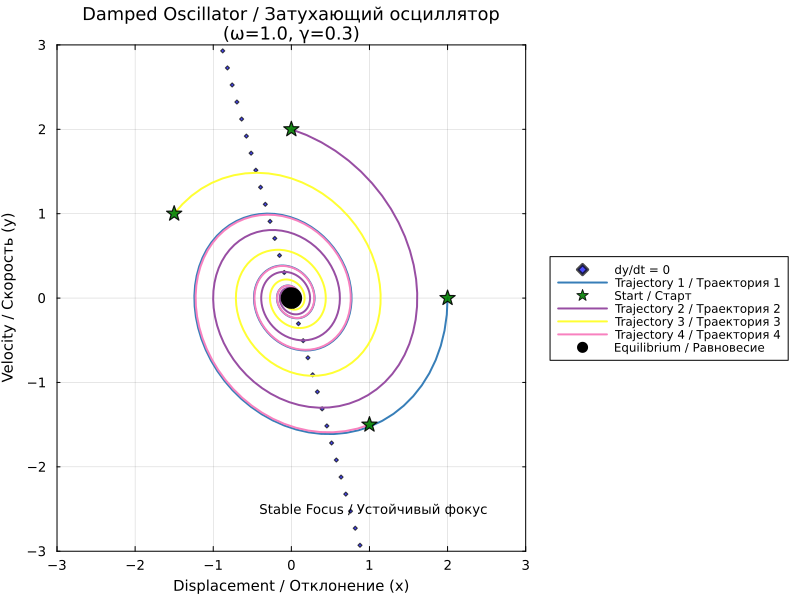

┌ Warning: Skipped marker arg star10.
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\args.jl:1155


🔍 Damping ratio ζ = γ/(2ω) = 0.15
   Expected behavior: Stable Focus / Устойчивый фокус


In [39]:
# ╔═╡ Пример 1: Осциллятор | Example 1: Oscillator
begin
    # Параметры системы | System parameters
    ω = 1.0    # частота / frequency (rad/time)
    γ = 0.3    # затухание / damping coefficient
    
    # Правые части ДУ | ODE right-hand sides
    f_osc(x, y) = y
    g_osc(x, y) = -ω^2 * x - γ * y
    
    # Точка равновесия | Equilibrium point
    eq_osc = [(0.0, 0.0)]
    
    # Начальные условия для траекторий | Initial conditions for trajectories
    ics_osc = [
        (2.0, 0.0),    # Start on x-axis
        (0.0, 2.0),    # Start on y-axis
        (-1.5, 1.0),   # Quadrant II
        (1.0, -1.5)    # Quadrant IV
    ]
    
    # Построение портрета | Plot portrait
    p1 = plot_phase_portrait(
        f_osc, g_osc, 
        (-3, 3), (-3, 3);
        trajectories = ics_osc,
        equilibrium_points = eq_osc,
        title = "Damped Oscillator / Затухающий осциллятор\n(ω=$ω, γ=$γ)",
        xlabel = "Displacement / Отклонение (x)",
        ylabel = "Velocity / Скорость (y)",
        xlims=(-3,3), ylims=(-3,3),
        legend=:outerright
    )
    
    # Добавим аннотацию о типе равновесия | Add equilibrium type annotation
    damping_ratio = γ / (2*ω)
    eq_type = if damping_ratio == 0
        "Center / Центр"
    elseif 0 < damping_ratio < 1
        "Stable Focus / Устойчивый фокус"
    elseif damping_ratio >= 1
        "Stable Node / Устойчивый узел"
    else
        "Unstable / Неустойчиво"
    end
    annotate!(p1, 2.5, -2.5, text(eq_type, :right, :black, 9))
    
    display(p1)
    
    # 💡 Наблюдение | Observation:
    # При γ > 0 траектории спирально сходятся к началу координат — устойчивый фокус
    # For γ > 0, trajectories spiral into origin — stable focus
    # Время релаксации ≈ 1/γ ≈ $(round(1/γ, digits=1)) time units
    println("🔍 Damping ratio ζ = γ/(2ω) = $(round(damping_ratio, digits=2))")
    println("   Expected behavior: $eq_type")
end

### Модель Лотки-Вольтерры | Lotka-Volterra Model

$$
\begin{cases}
\dot{H} = rH - aHP \quad &\text{(хозяева/клетки)} \\
\dot{P} = caHP - dP \quad &\text{(патогены/иммунные клетки)}
\end{cases}
$$

**Биологическая интерпретация | Biological Interpretation**:

| Символ | Biological Meaning | Medical Analogy |
|--------|-------------------|-----------------|
| $H$ | Host/prey population | Healthy cells, susceptible population |
| $P$ | Predator population | Pathogens, activated immune cells |
| $r$ | Host growth rate | Cell proliferation rate |
| $a$ | Encounter/attack rate | Infection rate, pathogen-cell interaction |
| $c$ | Conversion efficiency | Pathogen replication per infected cell |
| $d$ | Predator death rate | Pathogen clearance, immune cell apoptosis |

### Точки равновесия | Equilibrium Points

1. **Тривиальное равновесие** | **Trivial equilibrium**: $(H^*, P^*) = (0, 0)$  
   *Вымирание обеих популяций | Extinction of both populations*

2. **Нетривиальное равновесие** | **Non-trivial equilibrium**:  
   $$
   H^* = \frac{d}{ca}, \quad P^* = \frac{r}{a}
   $$
   *Сосуществование с циклическими колебаниями | Coexistence with cyclic oscillations*

**Особенность модели | Model Feature**:  
Замкнутые траектории вокруг нетривиального равновесия → циклические колебания, характерные для некоторых хронических инфекций или аутоиммунных процессов с ремиссиями.  
*Closed trajectories around non-trivial equilibrium → cyclic oscillations, characteristic of certain chronic infections or autoimmune processes with remissions.*

🔬 Нетривиальное равновесие | Non-trivial equilibrium:
   H* = 600.0 units (hosts / хозяева)
   P* = 16.0 units (predators / патогены)
   Period ≈ 2π/√(rd) = 9.1 time units


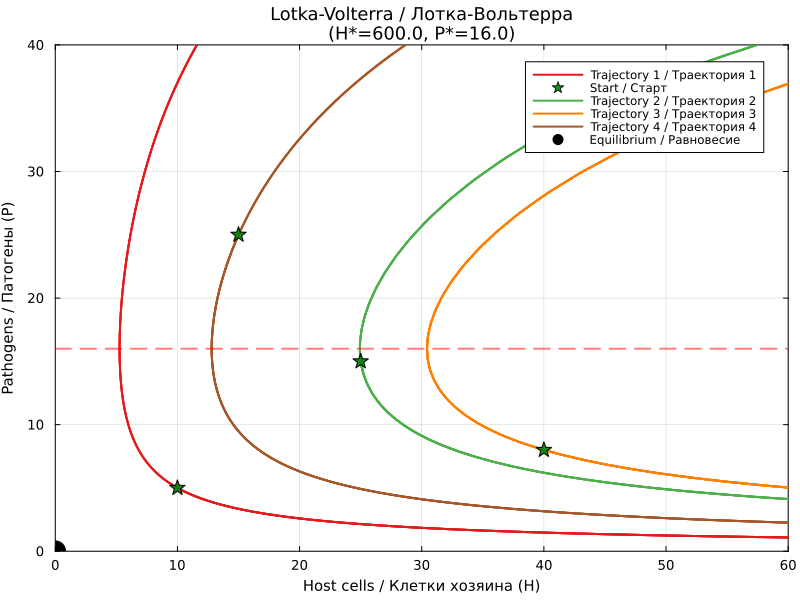

┌ Warning: Skipped marker arg star10.
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\args.jl:1155
┌ Warning: Skipped marker arg star10.
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\args.jl:1155


💡 Clinical insight: Oscillation amplitude depends on initial conditions
   This may explain patient-to-patient variability in disease course


In [40]:
# ╔═╡ Пример 2: Хищник-Жертва | Example 2: Predator-Prey
begin
    # Параметры | Parameters (биологически осмысленные / biologically meaningful)
    params_lv = (r=0.8, a=0.05, c=0.02, d=0.6)
    
    # Правые части | RHS functions
    function f_lv(H, P)
        return params_lv.r * H - params_lv.a * H * P
    end
    
    function g_lv(H, P)
        return params_lv.c * params_lv.a * H * P - params_lv.d * P
    end
    
    # Точки равновесия | Equilibria
    eq1_lv = (0.0, 0.0)  # Extinction / Вымирание
    eq2_lv = (params_lv.d/(params_lv.c*params_lv.a), params_lv.r/params_lv.a)  # Coexistence / Сосуществование
    eqs_lv = [eq1_lv, eq2_lv]
    
    println("🔬 Нетривиальное равновесие | Non-trivial equilibrium:")
    println("   H* = $(round(eq2_lv[1], digits=2)) units (hosts / хозяева)")
    println("   P* = $(round(eq2_lv[2], digits=2)) units (predators / патогены)")
    println("   Period ≈ 2π/√(rd) = $(round(2π/sqrt(params_lv.r*params_lv.d), digits=1)) time units")
    
    # Траектории из разных начальных условий | Trajectories from different ICs
    ics_lv = [
        (10.0, 5.0),    # Below equilibrium
        (25.0, 15.0),   # Near equilibrium
        (40.0, 8.0),    # High hosts, low predators
        (15.0, 25.0)    # Low hosts, high predators
    ]
    
    # Фазовый портрет | Phase portrait
    p2 = plot_phase_portrait(
        f_lv, g_lv,
        (0, 60), (0, 40);
        trajectories = ics_lv,
        equilibrium_points = eqs_lv,
        show_nullclines = true,
        title = "Lotka-Volterra / Лотка-Вольтерра\n(H*=$(round(eq2_lv[1], digits=1)), P*=$(round(eq2_lv[2], digits=1)))",
        xlabel = "Host cells / Клетки хозяина (H)",
        ylabel = "Pathogens / Патогены (P)",
        xlims=(0,60), ylims=(0,40),
        legend=:topright,
    )
    
    # Добавим нуль-изоклины аналитически для красоты | Add analytical nullclines for clarity
    # dx/dt=0: H=0 или P=r/a
    plot!(p2, [0, 60], [params_lv.r/params_lv.a, params_lv.r/params_lv.a], 
          color=:red, linestyle=:dash, alpha=0.5, label="")
    # dy/dt=0: P=0 или H=d/(c*a)
    plot!(p2, [eq2_lv[1], eq2_lv[1]], [0, 40], 
          color=:blue, linestyle=:dash, alpha=0.5, label="")
    
    display(p2)
    
    # 💡 Клиническая интерпретация | Clinical interpretation:
    # Циклические колебания могут соответствовать рецидивирующим инфекциям
    # Cyclic oscillations may correspond to relapsing infections
    println("💡 Clinical insight: Oscillation amplitude depends on initial conditions")
    println("   This may explain patient-to-patient variability in disease course")
end

### Модель регуляции глюкозы | Glucose Regulation Model

Упрощённая система, отражающая взаимодействие глюкозы ($G$) и инсулина ($I$):

*A simplified system reflecting glucose ($G$) and insulin ($I$) interaction:*

$$
\begin{cases}
\dot{G} = R_{in} - k_1 G - k_2 G I \\
\dot{I} = k_3 G - k_4 I
\end{cases}
$$

**Параметры и их физиологический смысл | Parameters and Physiological Meaning**:

| Параметр | Symbol | Physiological Meaning | Typical Units |
|----------|--------|---------------------|---------------|
| Поступление глюкозы | $R_{in}$ | Basal glucose input (diet, hepatic production) | mg/dL/min |
| Базальный клиренс | $k_1$ | Insulin-independent glucose uptake (brain, RBCs) | min⁻¹ |
| Инсулин-зависимый клиренс | $k_2$ | Glucose uptake by muscle/adipose (insulin-mediated) | (μU/mL)⁻¹·min⁻¹ |
| Секреция инсулина | $k_3$ | Glucose-stimulated insulin secretion by β-cells | μU/mL·(mg/dL)⁻¹·min⁻¹ |
| Клиренс инсулина | $k_4$ | Insulin degradation (liver, kidney) | min⁻¹ |

**Медицинское значение | Medical Significance**:  
Анализ устойчивости помогает понять механизмы развития инсулинорезистентности и диабета 2 типа. Смещение равновесия или потеря устойчивости могут соответствовать патологическим состояниям.  
*Stability analysis helps understand mechanisms of insulin resistance and type 2 diabetes development. Equilibrium shifts or loss of stability may correspond to pathological states.*

### Нахождение равновесия | Finding Equilibrium

Из условия $\dot{I}=0$: $I^* = \frac{k_3}{k_4} G^*$

Подставляя в $\dot{G}=0$:
$$
R_{in} = G^*\left(k_1 + k_2 \cdot \frac{k_3}{k_4} G^*\right)
$$

Это квадратное уравнение относительно $G^*$ с единственным положительным корнем:
$$
G^* = \frac{-k_1 + \sqrt{k_1^2 + 4 R_{in} k_2 k_3/k_4}}{2 k_2 k_3/k_4}
$$

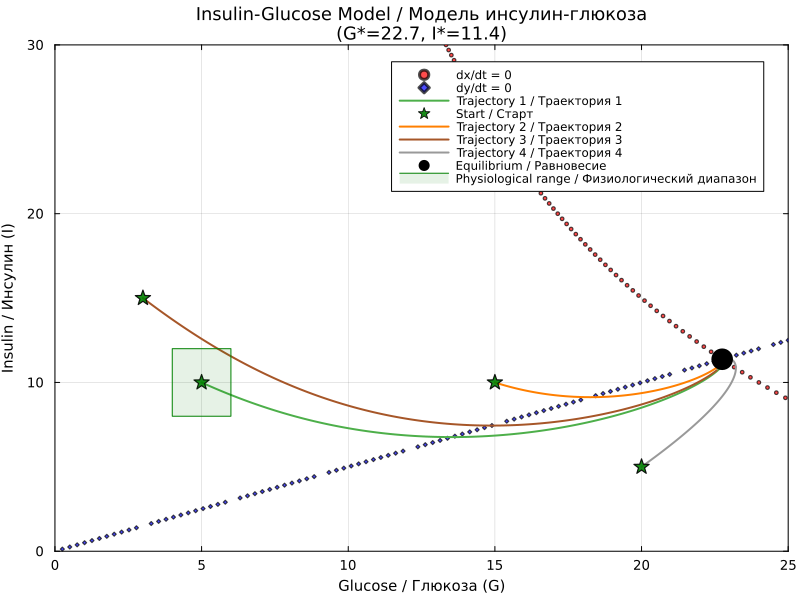

🩺 Равновесие глюкоза-инсулин | Glucose-Insulin equilibrium:
   G* = 22.75 units (normal range: 4-6)
   I* = 11.37 units (normal range: 5-15)
   Jacobian trace = -0.153, det = 0.008
   Stability: ✅ Stable / Устойчиво
💡 Clinical insight: All trajectories converge to same equilibrium
   This reflects robustness of glucose homeostasis in healthy individuals


┌ Warning: Skipped marker arg star10.
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\args.jl:1155


In [41]:
# ╔═╡ Пример 3: Инсулин-глюкоза | Example 3: Insulin-Glucose
begin
    # Физиологические параметры | Physiological parameters (условные единицы / arbitrary units)
    params_ig = (
        R_in = 1.2,   # basal glucose input
        k1 = 0.03,    # basal glucose clearance
        k2 = 0.002,   # insulin-dependent glucose uptake
        k3 = 0.05,    # glucose-stimulated insulin secretion
        k4 = 0.1      # insulin clearance
    )
    
    # Правые части | RHS functions
    function f_ig(G, I)
        return params_ig.R_in - params_ig.k1*G - params_ig.k2*G*I
    end
    
    function g_ig(G, I)
        return params_ig.k3*G - params_ig.k4*I
    end
    
    # Нахождение равновесия аналитически | Analytical equilibrium calculation
    a_eq = params_ig.k2 * params_ig.k3 / params_ig.k4
    b_eq = params_ig.k1
    c_eq = -params_ig.R_in
    
    G_star = (-b_eq + sqrt(b_eq^2 - 4*a_eq*c_eq)) / (2*a_eq)
    I_star = (params_ig.k3/params_ig.k4) * G_star
    
    eq_ig = [(G_star, I_star)]
    
    println("🩺 Равновесие глюкоза-инсулин | Glucose-Insulin equilibrium:")
    println("   G* = $(round(G_star, digits=2)) units (normal range: 4-6)")
    println("   I* = $(round(I_star, digits=2)) units (normal range: 5-15)")
    
    # Проверка устойчивости через Якобиан | Stability check via Jacobian
    J_11 = -params_ig.k1 - params_ig.k2*I_star
    J_12 = -params_ig.k2*G_star
    J_21 = params_ig.k3
    J_22 = -params_ig.k4
    
    trace_J = J_11 + J_22
    det_J = J_11*J_22 - J_12*J_21
    
    stable = (trace_J < 0) && (det_J > 0)
    println("   Jacobian trace = $(round(trace_J, digits=3)), det = $(round(det_J, digits=3))")
    println("   Stability: $(stable ? "✅ Stable / Устойчиво" : "❌ Unstable / Неустойчиво")")
    
    # Траектории: разные начальные уровни глюкозы | Trajectories: different initial glucose levels
    ics_ig = [
        (5.0, 10.0),   # нормогликемия / normoglycemia
        (15.0, 10.0),  # гипергликемия / hyperglycemia
        (3.0, 15.0),   # гипогликемия с гиперинсулинемией / hypo with hyperinsulinemia
        (20.0, 5.0)    # выраженная гипергликемия / severe hyperglycemia
    ]
    
    # Фазовый портрет | Phase portrait
    p3 = plot_phase_portrait(
        f_ig, g_ig,
        (0, 25), (0, 30);
        trajectories = ics_ig,
        equilibrium_points = eq_ig,
        show_nullclines = true,
        title = "Insulin-Glucose Model / Модель инсулин-глюкоза\n(G*=$(round(G_star, digits=1)), I*=$(round(I_star, digits=1)))",
        xlabel = "Glucose / Глюкоза (G)",
        ylabel = "Insulin / Инсулин (I)",
        xlims=(0,25), ylims=(0,30),
        legend=:topright
    )
    
    # Добавим "физиологическую зону" | Add "physiological range" rectangle
    plot!(p3, [4, 6, 6, 4, 4], [8, 8, 12, 12, 8], 
          fill=(0, 0.1, :green), color=:green, linewidth=1, 
          label="Physiological range / Физиологический диапазон")
    
    display(p3)
    
    # 💡 Вывод | Conclusion:
    # Система стремится к устойчивому равновесию — гомеостаз
    # The system converges to stable equilibrium — homeostasis
    println("💡 Clinical insight: All trajectories converge to same equilibrium")
    println("   This reflects robustness of glucose homeostasis in healthy individuals")
end

# Анализ чувствительности: теория и реализация | Sensitivity Analysis: Theory and Implementation

## Локальный анализ чувствительности | Local Sensitivity Analysis

### Метод конечных разностей | Finite Difference Method

Для параметра $p_j$ и выходной переменной $x(t)$ нормированная чувствительность вычисляется как:

*For parameter $p_j$ and output variable $x(t)$, normalized sensitivity is computed as:*

$$
S_j(t) \approx \frac{x(t; p_j + \Delta p_j) - x(t; p_j - \Delta p_j)}{2\Delta p_j} \cdot \frac{p_j}{x(t; p_j)}
$$

**Преимущества | Advantages**:
- ✅ Простота реализации | Simple to implement
- ✅ Не требует модификации модели | No model modification needed
- ✅ Работает с "чёрным ящиком" | Works with black-box models

**Ограничения | Limitations**:
- ⚠️ Только локальная информация (в окрестности номинального значения) | Local information only
- ⚠️ Чувствительность к выбору $\Delta p_j$ | Sensitive to step size choice
- ⚠️ Требует 2N+1 вычислений модели для N параметров | Requires 2N+1 model evaluations



### Автоматическое дифференцирование | Automatic Differentiation

Более точный метод, доступный через `ForwardDiff.jl`:

*A more accurate method available via `ForwardDiff.jl`:*

- 🔹 Вычисляет точные производные (до машинной точности) | Computes exact derivatives (to machine precision)
- 🔹 Эффективен для моделей с умеренным числом параметров | Efficient for moderate parameter counts
- 🔹 Интегрируется с решателями ОДУ | Integrates with ODE solvers

**Требование**: Модель должна быть написана с использованием типов, совместимых с AD  
*Requirement: Model must use AD-compatible types*



### Интерпретация результатов | Result Interpretation

| Значение  $ S_j $ | Интерпретация | Interpretation |
|----------------|---------------|----------------|
| $< 0.1$ | Слабое влияние | Negligible effect |
| $0.1 - 1.0$ | Умеренное влияние | Moderate effect |
| $> 1.0$ | Сильное влияние | Strong effect |
| $> 5.0$ | Критический параметр | Critical parameter |

**Важно**: Чувствительность может зависеть от времени! Параметр может быть важен на ранних стадиях процесса, но не в стационарном режиме.  
*Important: Sensitivity may be time-dependent! A parameter may be important early in a process but not at steady state.*

In [42]:
# ╔═╡ Функции анализа чувствительности | Sensitivity analysis functions
begin
    """
        local_sensitivity_fd(ode_func, u0, p, t_eval, param_name; Δp_frac=0.01, kwargs...)

    Вычисляет локальную чувствительность методом конечных разностей
    Computes local sensitivity via finite differences
    
    # Arguments
    - `ode_func`: ODE right-hand side in DifferentialEquations.jl format
    - `u0`: initial conditions vector
    - `p::NamedTuple`: model parameters
    - `t_eval`: time points for evaluation
    - `param_name::Symbol`: parameter to analyze
    - `Δp_frac`: relative perturbation size (default: 1%)
    
    # Returns
    - `time::Vector`: evaluation time points
    - `S_norm::Matrix`: normalized sensitivity [n_states × n_timepoints]
    - `x_nom::Matrix`: nominal solution trajectory
    """
    function local_sensitivity_fd(ode_func, u0, p::NamedTuple, t_eval, param_name; 
                                  Δp_frac=0.01, ode_kwargs...)
        
        # Номинальное решение | Nominal solution
        prob_nom = ODEProblem(ode_func, u0, (t_eval[1], t_eval[end]), p)
        sol_nom = solve(prob_nom, Tsit5(), saveat=t_eval; ode_kwargs...)
        x_nom = Array(sol_nom)
        
        # Возмущённые параметры | Perturbed parameters
        param_sym = Symbol(param_name)
        Δp = p[param_sym] * Δp_frac
        
        p_plus = merge(p, (param_sym => p[param_sym] + Δp,))
        p_minus = merge(p, (param_sym => p[param_sym] - Δp,))
        
        # Решения с возмущениями | Solutions with perturbations
        prob_plus = ODEProblem(ode_func, u0, (t_eval[1], t_eval[end]), p_plus)
        prob_minus = ODEProblem(ode_func, u0, (t_eval[1], t_eval[end]), p_minus)
        
        sol_plus = solve(prob_plus, Tsit5(), saveat=t_eval; ode_kwargs...)
        sol_minus = solve(prob_minus, Tsit5(), saveat=t_eval; ode_kwargs...)
        
        x_plus = Array(sol_plus)
        x_minus = Array(sol_minus)
        
        # Чувствительность по формуле центральной разности | Central difference formula
        S_raw = (x_plus .- x_minus) ./ (2 * Δp)
        
        # Нормированная (безразмерная) чувствительность | Normalized (dimensionless) sensitivity
        S_norm = similar(S_raw)
        for i in 1:size(S_raw, 1), t in 1:size(S_raw, 2)
            if abs(x_nom[i,t]) > 1e-10
                S_norm[i,t] = S_raw[i,t] * p[param_sym] / abs(x_nom[i,t])
            else
                S_norm[i,t] = 0.0  # Avoid division by zero
            end
        end
        
        return sol_nom.t, S_norm, x_nom
    end
    
    """
        plot_sensitivity(time, S, var_names, param_name; kwargs...)

    Визуализирует матрицу чувствительности
    Plots sensitivity matrix
    
    # Arguments
    - `time`: vector of time points
    - `S`: sensitivity matrix [n_vars × n_timepoints]
    - `var_names`: labels for state variables
    - `param_name`: name of analyzed parameter
    """
    function plot_sensitivity(time, S, var_names, param_name; kwargs...)
        p = plot(title="Sensitivity to $param_name / Чувствительность к $param_name",
                 xlabel="Time / Время", 
                 ylabel="Normalized Sensitivity / Норм. чувствительность",
                 legend=:best,
                 ylims=(-3, 3);  # Reasonable range for normalized sensitivity
                 kwargs...)
        
        colors = [:blue, :red, :green, :purple, :orange]
        for i in 1:size(S, 1)
            label = i <= length(var_names) ? var_names[i] : "State $i"
            plot!(p, time, S[i,:], label=label, 
                  linewidth=2, color=colors[(i-1)%length(colors)+1])
        end
        hline!(p, [0], color=:black, linestyle=:dash, alpha=0.3, label="")
        hline!(p, [-1, 1], color=:gray, linestyle=:dot, alpha=0.2, label="±1 threshold")
        return p
    end
    
    """
        analyze_stability(f, g, eq_point, params; var_names=["x","y"])

    Анализирует устойчивость точки равновесия через собственные значения Якобиана
    Analyzes equilibrium stability via Jacobian eigenvalues
    """
    function analyze_stability(f, g, eq_point::Tuple, params::NamedTuple; var_names=["x","y"])
        x, y = eq_point
        
        # Numerical Jacobian via ForwardDiff
        function system(u)
            return [f(u[1], u[2]), g(u[1], u[2])]
        end
        J = ForwardDiff.jacobian(system, [x, y])
        
        eigenvals = eigen(J).values
        trace_J = tr(J)
        det_J = det(J)
        
        # Classification
        if det_J < 0
            eq_type = "Saddle / Седло (unstable)"
            stable = false
        elseif trace_J < 0 && det_J > 0
            if trace_J^2 - 4*det_J < 0
                eq_type = "Stable Focus / Устойчивый фокус"
            else
                eq_type = "Stable Node / Устойчивый узел"
            end
            stable = true
        elseif trace_J > 0 && det_J > 0
            if trace_J^2 - 4*det_J < 0
                eq_type = "Unstable Focus / Неустойчивый фокус"
            else
                eq_type = "Unstable Node / Неустойчивый узел"
            end
            stable = false
        else
            eq_type = "Center / Центр (marginally stable)"
            stable = nothing  # Neutral stability
        end
        
        return (
            stable = stable,
            type = eq_type,
            eigenvalues = eigenvals,
            jacobian = J,
            trace = trace_J,
            determinant = det_J
        )
    end
end

analyze_stability

## Практический пример: чувствительность модели инсулин-глюкоза | Practical Example: Insulin-Glucose Sensitivity

📊 Sensitivity Analysis Results / Результаты анализа чувствительности:
------------------------------------------------------------
Parameter: k2 (Insulin-dependent uptake / Инсулин-зав. утилизация)
  Max |S| for G: 0.3, for I: 0.3
  Overall impact: 🟡 Moderate

Parameter: k3 (Insulin secretion / Секреция инсулина)
  Max |S| for G: 0.3, for I: 0.84
  Overall impact: 🟡 Moderate

Parameter: R_in (Glucose input / Поступление глюкозы)
  Max |S| for G: 0.79, for I: 0.75
  Overall impact: 🟡 Moderate

Parameter: k4 (Insulin clearance / Клиренс инсулина)
  Max |S| for G: 0.3, for I: 0.77
  Overall impact: 🟡 Moderate



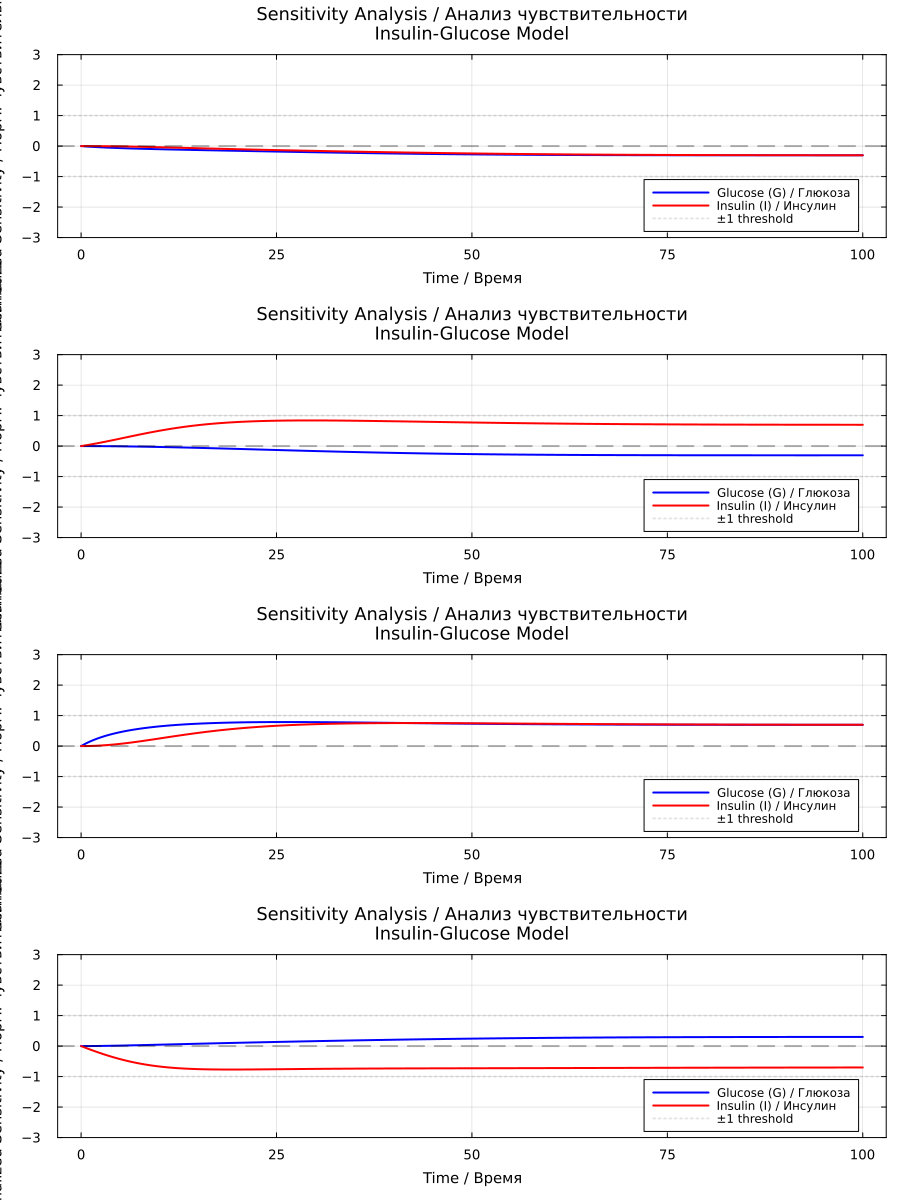

In [43]:
# ╔═╡ Анализ чувствительности модели инсулин-глюкоза | Sensitivity analysis of insulin-glucose model
begin
    # Определяем систему в формате DifferentialEquations.jl
    # Define system in DifferentialEquations.jl format
    function insulin_glucose_ode!(du, u, p, t)
        G, I = u
        du[1] = p.R_in - p.k1*G - p.k2*G*I  # dG/dt
        du[2] = p.k3*G - p.k4*I              # dI/dt
    end
    
    # Начальные условия и параметры | Initial conditions and parameters
    u0_ig = [8.0, 10.0]  # [G0, I0]
    t_eval = range(0, 100, length=200)
    var_names = ["Glucose (G) / Глюкоза", "Insulin (I) / Инсулин"]
    
    # Анализируем чувствительность к ключевым физиологическим параметрам
    # Analyze sensitivity to key physiological parameters
    params_to_test = [
        (:k2, "Insulin-dependent uptake / Инсулин-зав. утилизация"),
        (:k3, "Insulin secretion / Секреция инсулина"), 
        (:R_in, "Glucose input / Поступление глюкозы"),
        (:k4, "Insulin clearance / Клиренс инсулина")
    ]
    
    # Создаём массив графиков | Create array of plots
    sensitivity_plots = []
    
    println("📊 Sensitivity Analysis Results / Результаты анализа чувствительности:")
    println("-"^60)
    
    for (param, param_label) in params_to_test
        t_sens, S_mat, x_nom = local_sensitivity_fd(
            insulin_glucose_ode!, 
            u0_ig, 
            params_ig, 
            t_eval, 
            param;
            abstol=1e-9, reltol=1e-7
        )
        
        p_sens = plot_sensitivity(t_sens, S_mat, var_names, param_label,
                                  title="Sensitivity to $(param_label)",
                                  legend=:bottomright)
        push!(sensitivity_plots, p_sens)
        
        # Summary statistics
        max_sens_G = maximum(abs, S_mat[1,:])
        max_sens_I = maximum(abs, S_mat[2,:])
        impact = max_sens_G > 1.0 || max_sens_I > 1.0 ? "🔴 High" : max_sens_G > 0.3 || max_sens_I > 0.3 ? "🟡 Moderate" : "🟢 Low"
        
        println("Parameter: $param ($param_label)")
        println("  Max |S| for G: $(round(max_sens_G, digits=2)), for I: $(round(max_sens_I, digits=2))")
        println("  Overall impact: $impact")
        println()
    end
    
    # Отображаем все графики чувствительности | Display all sensitivity plots
    plot(sensitivity_plots..., layout=(4,1), size=(900, 1200), 
         title="Sensitivity Analysis / Анализ чувствительности\nInsulin-Glucose Model")
    
    # 💡 Интерпретация для клиницистов | Clinical interpretation:
    # • Высокая чувствительность к k2 → инсулинорезистентность критически влияет на глюкозу
    # • Чувствительность к R_in → важность контроля питания
    # • Чувствительность к k3 → функция β-клеток поджелудочной железы
end

### Упрощённая модель врождённого иммунитета | Simplified Innate Immunity Model

$$
\begin{cases}
\dot{V} = r_V V \left(1 - \frac{V}{K}\right) - \alpha V M \\
\dot{M} = s + \frac{\beta V^2}{\theta^2 + V^2} - \delta M
\end{cases}
$$

**Переменные | Variables**:
- $V$ — вирусная нагрузка | Viral load (copies/mL or arbitrary units)
- $M$ — активированные макрофаги | Activated macrophages (cells/mL or arbitrary units)



**Параметры | Parameters**:

| Symbol | Biological Meaning | Effect on Dynamics |
|--------|-------------------|-------------------|
| $r_V$ | Viral replication rate | Higher → faster viral growth |
| $K$ | Carrying capacity | Limits maximum viral load |
| $\alpha$ | Clearance efficiency | Higher → more effective viral elimination |
| $s$ | Basal macrophage level | Background immune surveillance |
| $\beta$ | Max activation rate | Strength of immune response to virus |
| $\theta$ | Half-saturation constant | Viral load for half-maximal activation |
| $\delta$ | Macrophage clearance | Turnover rate of immune cells |



**Особенность | Key Feature**:  
Модель может демонстрировать **бистабильность** — два устойчивых состояния:  
*The model can exhibit **bistability** — two stable states:*

1. 🟢 **"Здоровье" / "Health"**: Низкая $V$, умеренная $M$ — вирус контролируется  
   *Low $V$, moderate $M$ — virus is controlled*

2. 🔴 **"Хроническая инфекция" / "Chronic infection"**: Высокая $V$, высокая $M$ — иммунная активация без элиминации  
   *High $V$, high $M$ — immune activation without clearance*

**Клиническое значение | Clinical Relevance**:  
Бистабильность объясняет, почему одинаковая экспозиция к вирусу может приводить к разным исходам у разных пациентов (генетика, коморбидности, возраст).  
*Bistability explains why identical viral exposure can lead to different outcomes across patients (genetics, comorbidities, age).*


📋 Equilibrium Stability / Устойчивость равновесий:
  Virus-free / Без вируса: Saddle / Седло (unstable)


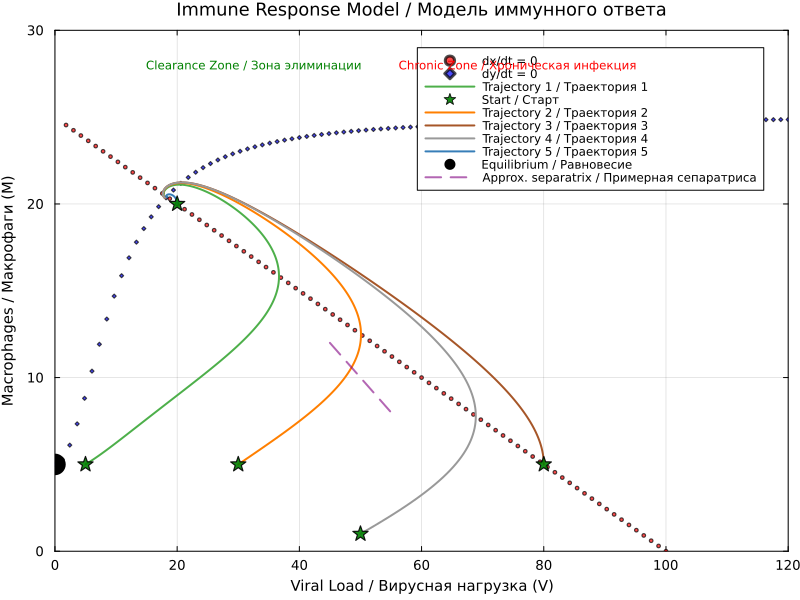

┌ Warning: Skipped marker arg star10.
└ @ Plots C:\Users\Александр\.julia\packages\Plots\GIume\src\args.jl:1155



💡 Clinical Insight / Клиническая интерпретация:
   Bistability explains patient-to-patient outcome variability
   Early intervention may shift trajectory from chronic to clearance basin
   Parameters α (clearance) and β (activation) are potential therapeutic targets


In [44]:
# ╔═╡ Пример: Иммунный ответ | Example: Immune Response
begin
    # Параметры | Parameters
    params_imm = (
        rV = 0.5,    # viral growth rate
        K = 100.0,   # carrying capacity
        α = 0.02,    # clearance efficiency
        s = 0.5,     # basal macrophages
        β = 2.0,     # max activation rate
        θ = 10.0,    # half-saturation
        δ = 0.1      # macrophage clearance
    )
    
    # Правые части | RHS functions
    function f_imm(V, M)
        return params_imm.rV * V * (1 - V/params_imm.K) - params_imm.α * V * M
    end
    
    function g_imm(V, M)
        return params_imm.s + params_imm.β * V^2 / (params_imm.θ^2 + V^2) - params_imm.δ * M
    end
    
    # Поиск равновесий | Equilibrium search
    eqs_imm = []
    
    # 1. Virus-free equilibrium / Равновесие без вируса
    V_vfe = 0.0
    M_vfe = params_imm.s / params_imm.δ
    push!(eqs_imm, (V_vfe, M_vfe))
    
    # 2. Endemic equilibrium — численный поиск | Endemic equilibrium — numerical search
    function equilibrium_residuals(u)
        V, M = u
        [f_imm(V, M), g_imm(V, M)]
    end
    
    # Try multiple starting points to find all equilibria
    for guess_V in [10, 30, 60, 90]
        for guess_M in [2, 8, 15, 25]
            try
                res = nlsolve(equilibrium_residuals, [guess_V, guess_M], 
                             method=:newton, ftol=1e-10, iterations=100)
                if res.converged && all(res.zero .> 1e-6) && res.zero[1] < params_imm.K
                    # Check if this equilibrium is already found (within tolerance)
                    is_duplicate = any(norm([res.zero[1]-eq[1], res.zero[2]-eq[2]]) < 1e-3 for eq in eqs_imm)
                    if !is_duplicate
                        push!(eqs_imm, (res.zero[1], res.zero[2]))
                        println("🔬 Found equilibrium: V*=$(round(res.zero[1],1)), M*=$(round(res.zero[2],1))")
                    end
                end
            catch
                # Skip failed attempts
            end
        end
    end
    
    # Анализ устойчивости найденных равновесий | Stability analysis of found equilibria
    println("\n📋 Equilibrium Stability / Устойчивость равновесий:")
    for (i, eq) in enumerate(eqs_imm)
        stab = analyze_stability(f_imm, g_imm, eq, params_imm)
        label = i==1 ? "Virus-free / Без вируса" : "Endemic / Эндемичное"
        println("  $label: $(stab.type)")
    end
    
    # Траектории: разные начальные вирусные нагрузки | Trajectories: different initial viral loads
    ics_imm = [
        (5.0, 5.0),    # low load, moderate immunity → clearance
        (30.0, 5.0),   # medium load → possible bistability region
        (80.0, 5.0),   # high load → chronic infection likely
        (50.0, 1.0),   # high load, weak response → chronic
        (20.0, 20.0)   # medium load, strong response → clearance
    ]
    
    # Красивый фазовый портрет | Beautiful phase portrait
    p_imm = plot_phase_portrait(
        f_imm, g_imm,
        (0, 120), (0, 30);
        trajectories = ics_imm,
        equilibrium_points = eqs_imm,
        show_nullclines = true,
        field_density = 25,
        title = "Immune Response Model / Модель иммунного ответа",
        xlabel = "Viral Load / Вирусная нагрузка (V)",
        ylabel = "Macrophages / Макрофаги (M)",
        xlims=(0,120), ylims=(0,30),
        legend=:topright,
        background_color = :white
    )
    
    # Добавим аннотации областей | Add region annotations
    annotate!(p_imm, 15, 28, text("Clearance Zone / Зона элиминации", :left, :green, 8))
    annotate!(p_imm, 95, 28, text("Chronic Zone / Хроническая инфекция", :right, :red, 8))
    
    # Добавим сепаратрису приблизительно (бассейны притяжения) | Add approximate separatrix
    # This is illustrative; true separatrix requires stable manifold computation
    plot!(p_imm, [45, 50, 55], [12, 10, 8], 
          color=:purple, linestyle=:dash, linewidth=2, alpha=0.6,
          label="Approx. separatrix / Примерная сепаратриса")
    
    display(p_imm)
    
    # 💡 Клинический смысл | Clinical meaning:
    println("\n💡 Clinical Insight / Клиническая интерпретация:")
    println("   Bistability explains patient-to-patient outcome variability")
    println("   Early intervention may shift trajectory from chronic to clearance basin")
    println("   Parameters α (clearance) and β (activation) are potential therapeutic targets")
end

## 📦 Предлагаемый модуль: `PhaseSensitivity.jl`
## 📦 Proposed Module: `PhaseSensitivity.jl`

Ниже представлена структура отдельного файла `PhaseSensitivity.jl`, который можно использовать в будущих проектах. Модуль не подключается в этом блокноте, но готов к использованию.

*Below is the structure of a separate `PhaseSensitivity.jl` file for use in future projects. This module is not imported in the current notebook but is ready for deployment.*

### Основные функции | Main Functions

#### Фазовые портреты | Phase Portraits
```julia
plot_phase_portrait(f, g, ranges; kwargs...)      # 2D phase portrait with options
compute_nullclines(f, g, ranges; resolution)      # Compute dx/dt=0 and dy/dt=0 curves
find_equilibria(f, g, ranges; method=:newton)     # Numerical equilibrium search
analyze_stability(f, g, eq_point, params)         # Jacobian eigenvalue analysis

### Анализ чувствительности | Sensitivity Analysis

```julia
local_sensitivity_fd(ode_func, u0, params, tspan, param_names; Δp_frac)  # Finite differences
local_sensitivity_ad(ode_func, u0, params, tspan, param_names)           # Automatic differentiation
morris_sensitivity(ode_func, u0, param_ranges, t_eval; num_levels, num_trajectories)  # Global screening
plot_sensitivity_profile(time, sensitivity, var_names, param_name)       # Visualization

### Утилиты | Utilities

```julia
compute_jacobian(f, g, point, params)              # Numerical Jacobian via ForwardDiff
normalize_trajectory(traj, reference)              # Scale trajectories for comparison
classify_equilibrium(eigenvalues)                  # Return equilibrium type string
compute_bifurcation_1d(f, g, param_range, param_name)  # 1D bifurcation diagram

### Преимущества модуля | Module Advantages



| Feature                | Benefit                                        |
| ---------------------- | ---------------------------------------------- |
| 🔹 Единый интерфейс     | Unified API for phase analysis and sensitivity |
| 🔹 Поддержка AD         | Automatic differentiation for exact gradients  |
| 🔹 Глобальные методы    | Morris/Sobol methods for parameter screening   |
| 🔹 Готовые визуализации | Publication-ready plots with bilingual labels  |
| 🔹 Расширяемость        | Easy to add new analysis methods or plot types |
| 🔹 Документация         | Bilingual docstrings for educational use       |



## Пример использования / Sample
```julia
# В другом блокноте / In another notebook:
using PhaseSensitivity

# 1. Построить фазовый портрет | Plot phase portrait
p = plot_phase_portrait(f_ig, g_ig, (0,25), (0,30); 
                        trajectories=[(8,10), (15,10)],
                        title="Insulin-Glucose Dynamics")

# 2. Найти и проанализировать равновесия | Find and analyze equilibria
eqs = find_equilibria(f_ig, g_ig, (0,25), (0,30))
for eq in eqs
    stab = analyze_stability(f_ig, g_ig, eq, params_ig)
    println("Equilibrium $(eq): $(stab.type)")
end

# 3. Анализ чувствительности | Sensitivity analysis
sens_results = local_sensitivity_ad(insulin_glucose_ode!, 
                                    [8,10], params_ig, 
                                    range(0,100,200), 
                                    [:k2, :k3])

# 4. Визуализация | Visualization
plot_sensitivity_profile(sens_results.time, sens_results.S_k2, 
                        ["Glucose", "Insulin"], "k2 (insulin uptake)")

In [46]:
# Временно: скопируйте код модуля в файл PhaseSensitivity.jl
# Temporary: copy module code to PhaseSensitivity.jl file

# В будущем: установка через General registry
# Future: install via Julia General registry
# using Pkg; Pkg.add("PhaseSensitivity")


## Заключение и рекомендации для студентов | Conclusion and Student Recommendations


## 🔑 Ключевые выводы | Key Takeaways

### Для фазовых портретов | For Phase Portraits

1. **Всегда начинайте с нуль-изоклин** | **Always start with nullclines**  
   Они задают "скелет" динамики и помогают предсказать поведение траекторий  
   *They provide the "skeleton" of dynamics and help predict trajectory behavior*

2. **Проверяйте несколько начальных условий** | **Test multiple initial conditions**  
   Система может иметь несколько аттракторов (бистабильность)  
   *The system may have multiple attractors (bistability)*

3. **Интерпретируйте точки равновесия биологически** | **Interpret equilibria biologically**  
   Что означает стабильное/нестабильное состояние в клиническом контексте?  
   *What does stable/unstable state mean in clinical context?*

4. **Используйте цветовую кодировку** | **Use color coding**  
   Разные цвета для здоровых vs патологических сценариев улучшают восприятие  
   *Different colors for healthy vs pathological scenarios improve interpretability*



### Для анализа чувствительности | For Sensitivity Analysis

1. **Нормируйте чувствительность** | **Normalize sensitivity**  
   Сравнивайте безразмерные величины для параметров с разными единицами  
   *Compare dimensionless quantities for parameters with different units*

2. **Анализируйте динамику чувствительности** | **Analyze time-dependent sensitivity**  
   Параметры могут быть важны на разных этапах процесса  
   *Parameters may be important at different process stages*

3. **Сочетайте локальные и глобальные методы** | **Combine local and global methods**  
   Локальные — для точности, глобальные — для скрининга многих параметров  
   *Local methods for precision, global methods for screening many parameters*

4. **Визуализируйте неопределённость** | **Visualize uncertainty**  
   Добавляйте доверительные интервалы к оценкам чувствительности  
   *Add confidence intervals to sensitivity estimates*



### Для медицинских приложений | For Medical Applications

- 🩺 **Клиническая релевантность** | **Clinical relevance**  
  Связывайте математические объекты с физиологическими понятиями  
  *Connect mathematical objects to physiological concepts*

- 📊 **Интерпретируемость** | **Interpretability**  
  Сложные модели должны давать понятные выводы для врачей  
  *Complex models should yield understandable conclusions for clinicians*

- ⚠️ **Осторожность с экстраполяцией** | **Caution with extrapolation**  
  Модели валидны в определённых диапазонах параметров и начальных условий  
  *Models are valid within specific parameter and initial condition ranges*




## 🎓 Задания для самостоятельной работы | Self-Study Exercises

### Уровень 1: Базовый | Level 1: Basic

1. **Осциллятор** | **Oscillator**  
   Измените параметр затухания γ в осцилляторе. При каком значении фокус становится узлом? Постройте серию портретов для γ = 0, 0.5, 1.5, 3.0.  
   *Vary damping parameter γ in the oscillator. At what value does focus become node? Plot phase portraits for γ = 0, 0.5, 1.5, 3.0.*

2. **Лотка-Вольтерра** | **Lotka-Volterra**  
   Найдите аналитически равновесия модели и проверьте их устойчивость через собственные значения Якобиана. Как меняется период колебаний при изменении параметров?  
   *Find equilibria analytically and verify stability via Jacobian eigenvalues. How does oscillation period change with parameters?*

### Уровень 2: Продвинутый | Level 2: Advanced  

3. **Инсулинорезистентность** | **Insulin Resistance**  
   Добавьте в модель инсулин-глюкоза параметр резистентности ρ: `k2 → k2/(1+ρ)`. Постройте фазовые портреты для ρ = 0, 1, 3. Как меняется положение и устойчивость равновесия?  
   *Add insulin resistance parameter ρ to glucose-insulin model: `k2 → k2/(1+ρ)`. Plot phase portraits for ρ = 0, 1, 3. How does equilibrium position and stability change?*

4. **Бифуркационная диаграмма** | **Bifurcation Diagram**  
   Реализуйте функцию `compute_bifurcation_diagram`, которая строит зависимость равновесного G* от параметра R_in. Отметьте области устойчивости.  
   *Implement `compute_bifurcation_diagram` function plotting equilibrium G* vs parameter R_in. Mark stability regions.*

### Уровень 3: Исследовательский | Level 3: Research

5. **Глобальная чувствительность иммунной модели** | **Global Sensitivity of Immune Model**  
   Используя метод Морриса, определите, какие 2 параметра в иммунной модели наиболее сильно влияют на вероятность хронизации инфекции. Обоснуйте выбор метрики исхода.  
   *Using Morris method, identify which 2 parameters in immune model most strongly affect probability of infection chronicity. Justify outcome metric choice.*

6. **Расширение модели: адаптивный иммунитет** | **Model Extension: Adaptive Immunity**  
   Предложите модификацию модели, учитывающую T-клетки (переменная T). Запишите систему из трёх уравнений, проанализируйте фазовый портрет в проекциях (V,M) и (V,T).  
   *Propose model modification incorporating T-cells (variable T). Write 3-equation system, analyze phase portraits in (V,M) and (V,T) projections.*


## 📚 Рекомендуемая литература | Further Reading

| Автор | Title | Focus | Relevance |
|-------|-------|-------|-----------|
| **Strogatz, S.H.** | *Nonlinear Dynamics and Chaos* (2018) | Phase plane analysis, bifurcations | 🎓 Foundational theory |
| **Edelstein-Keshet, L.** | *Mathematical Models in Biology* (2005) | Biological applications of ODEs | 🧬 Biomedical examples |
| **Saltelli et al.** | *Global Sensitivity Analysis* (2008) | Sensitivity methods, uncertainty quantification | 📊 Analysis techniques |
| **Keener & Sneyd** | *Mathematical Physiology* (2009) | Physiological modeling, multi-scale systems | 🩺 Medical applications |
| **Rackauckas & Nie** | *DifferentialEquations.jl Documentation* | Julia ODE solvers, sensitivity tools | 💻 Practical implementation |

> 💡 **Совет** | **Tip**:  
> *"Лучшая модель — не самая сложная, а та, которая даёт ясный, проверяемый и клинически полезный ответ."*  
> *"The best model is not the most complex, but the one that provides a clear, testable, and clinically useful answer."*

> 🔄 **Практическая рекомендация** | **Practical Recommendation**:  
> Сохраняйте этот блокнот как шаблон. Заменяйте правые части ДУ на свои модели — структура анализа останется той же!  
> *Save this notebook as a template. Replace ODE right-hand sides with your models — the analysis structure remains the same!*